<a href="https://colab.research.google.com/github/Hashwineey/Data-Science-Project-2_Sales-Data-Analysis/blob/main/P146219_Project2_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Project 2 Part 2: Data Analysis**

## *The ideal goal is to analyze the sales transactions, customer behavior, and product performance in order to provide actionable insights and strategies that will drive revenue growth, increase customer retention, and optimize profit margins.*

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [31]:
# Load cleaned_data.csv file
df = pd.read_csv('/content/drive/MyDrive/STQD6014_DataScience/Project 2/cleaned_data.csv')
df.head()

,CustomerKey,MaritalStatus,Gender,AnnualIncome,EducationLevel,Occupation,OrderDate,OrderQuantity,Year,ModelName,...,ProductPrice,CategoryName,SubcategoryName,ReturnQuantity,Region,Country,Continent,AgeClass,AnnualIncomeClass,ProductProfit
0,11000,M,M,90000,Bachelors,Professional,2016-11,1,2016-01-01,Short-Sleeve Classic Jersey,...,53.99,Clothing,Jerseys,1,Australia,Australia,Pacific,"(50, 60]","(80000, 120000]",12.42
1,11000,M,M,90000,Bachelors,Professional,2016-11,2,2016-01-01,Touring Tire,...,28.99,Accessories,Tires and Tubes,1,Australia,Australia,Pacific,"(50, 60]","(80000, 120000]",18.15
2,11000,M,M,90000,Bachelors,Professional,2016-11,2,2016-01-01,Touring Tire Tube,...,4.99,Accessories,Tires and Tubes,1,Australia,Australia,Pacific,"(50, 60]","(80000, 120000]",3.12
3,11000,M,M,90000,Bachelors,Professional,2016-11,1,2016-01-01,Sport-100,...,34.99,Accessories,Helmets,1,Australia,Australia,Pacific,"(50, 60]","(80000, 120000]",21.90
4,11000,M,M,90000,Bachelors,Professional,2016-11,1,2016-01-01,Touring-1000,...,2384.07,Bikes,Touring Bikes,1,Australia,Australia,Pacific,"(50, 60]","(80000, 120000]",902.13


In [6]:
df.shape

(51764, 21)

### Customer Demographic Analysis

In [9]:
# Since we have multiple records of the same customer, we need to drop the duplicated customerkey
# to get the unique customers
unique_cust = df.drop_duplicates(subset='CustomerKey')

# Moving forward, we can use this 'unique_cust' dataframe for our demographic analysis

# Get the count of unique customers
print(unique_cust['CustomerKey'].value_counts().sum())

15730


Combine plot all of the overall demographics:
1. Gender Count of Customer
2. Count of Age Group of Customers
3. Marital Status of the Customers
4. Customers' Education Level
5. Customers' Occupation
6. Customers' Annual Income Group Count

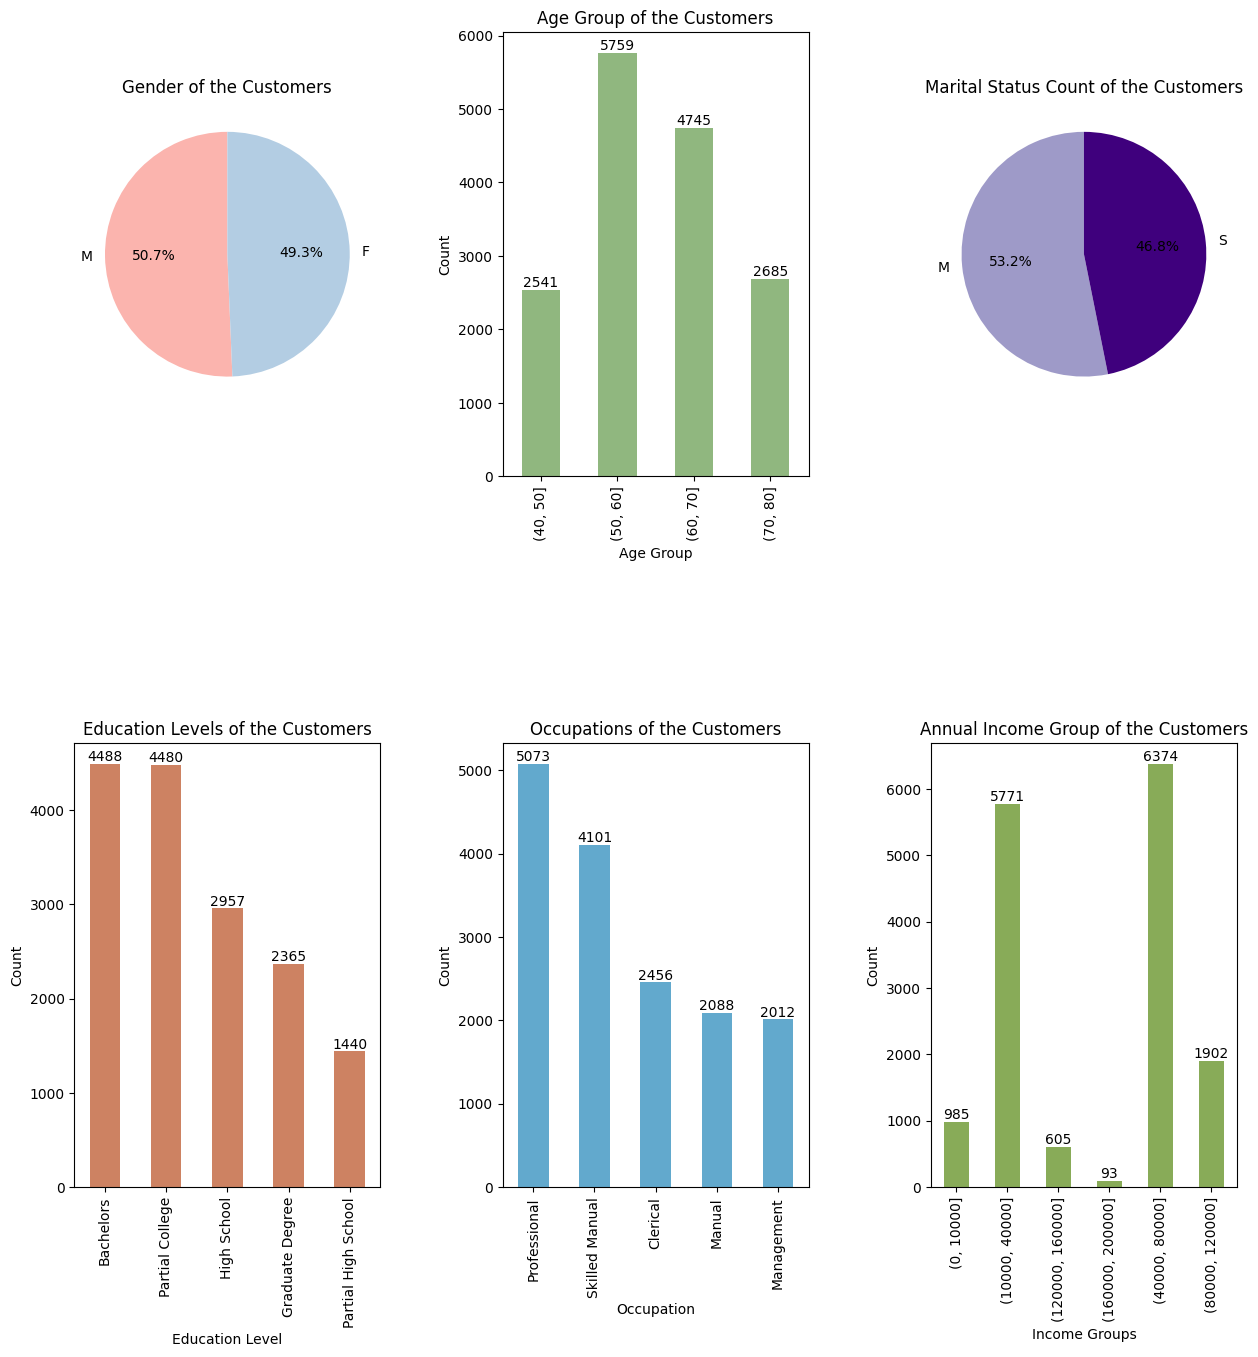

In [10]:
# Set up a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  # 3 rows, 2 columns of subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# 1. Customers' Gender
gender_counts = unique_cust['Gender'].value_counts() # Define variable for gender counts
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
               startangle=90, colors=plt.cm.Pastel1.colors)
axes[0, 0].set_title('Gender of the Customers')

# 2. Age Group of Customers
age_count = unique_cust['AgeClass'].value_counts().sort_index() # Define variable for age group counts
age_count.plot.bar(ax=axes[0, 1], color='#90b77f', alpha=1)
axes[0, 1].set_title('Age Group of the Customers')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Count')
axes[0, 1].bar_label(axes[0, 1].containers[0], label_type='edge', fontsize=10)

# 3. Marital Status of the Customers
marital_status_count = unique_cust.groupby('MaritalStatus').size() # Define variable for marital status counts
colors = plt.cm.Purples(np.linspace(0.5, 1, len(marital_status_count)))
axes[0, 2].pie(marital_status_count, labels=marital_status_count.index,
               autopct='%1.1f%%', startangle=90, colors=colors)
axes[0, 2].set_title('Marital Status Count of the Customers')

# 4. Customers' Education Level
edu_count = unique_cust['EducationLevel'].value_counts() # Define variable for educational level counts
edu_count.plot.bar(ax=axes[1, 0], color='#cd8262', alpha=1)
axes[1, 0].set_title('Education Levels of the Customers')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].bar_label(axes[1, 0].containers[0], label_type='edge', fontsize=10)

# 5. Customers' Occupations
occu_count = unique_cust['Occupation'].value_counts() # Define variable for occupation counts
occu_count.plot.bar(ax=axes[1, 1], color='#62a9cd', alpha=1)
axes[1, 1].set_title('Occupations of the Customers')
axes[1, 1].set_xlabel('Occupation')
axes[1, 1].set_ylabel('Count')
axes[1, 1].bar_label(axes[1, 1].containers[0], label_type='edge', fontsize=10)

# 6. Customers' Annual Income Range
income_bin_count = unique_cust['AnnualIncomeClass'].value_counts().sort_index() # Define variable for income group counts
income_bin_count.plot.bar(ax=axes[1, 2], color='#88ab58', alpha=1)
axes[1, 2].set_title('Annual Income Group of the Customers')
axes[1, 2].set_xlabel('Income Groups')
axes[1, 2].set_ylabel('Count')
axes[1, 2].bar_label(axes[1, 2].containers[0], label_type='edge', fontsize=10)

# Show the combined plots
plt.show()

What we analyzed is the **overall demographic** of the customers.
1. We can see that most of our customers are male
   but the difference between percentage of male and female customers is not much of a difference.
2. All of our customers are the age of 40 and above, and majority of them are of the age 51 till 60.
3. Our customers are mostly married while not too less of them are single.
4. Majority of our customers had completed their Bachelors degree which explains why a lot of them are professionals.
5. We can also say that 77% of our customers are of working / middle class with their annual income ranging from 11000 to 80000
   dollars.

We can also obtain the relationship between some of these demographics and the profit. E.g.,
1. Annual Income and Age Group ~ Profit
2. Gender ~ Profit
3. Occupation ~ Profit

#### Total Profit by Customers' Annual Income and Age Group

In [14]:
# Get the total profit by categorizing annual income and age group
inc_age_profit = df.groupby(['AnnualIncomeClass','AgeClass'])['ProductProfit'].sum().reset_index(name='TotalProfit')
inc_age_profit.head()

,AnnualIncomeClass,AgeClass,TotalProfit
0,"(0, 10000]","(40, 50]",158649.91
1,"(0, 10000]","(50, 60]",89131.11
2,"(0, 10000]","(60, 70]",50729.82
3,"(0, 10000]","(70, 80]",32876.05
4,"(10000, 40000]","(40, 50]",452248.64


In [15]:
# Use pivot to separate AgeClass into separate columns
inc_age_profit_pivot = inc_age_profit.pivot(index='AnnualIncomeClass', columns='AgeClass', values='TotalProfit')
inc_age_profit_pivot

AgeClass,"(40, 50]","(50, 60]","(60, 70]","(70, 80]"
AnnualIncomeClass,,,,
"(0, 10000]",158649.91,89131.11,50729.82,32876.05
"(10000, 40000]",452248.64,802046.75,511213.91,311028.96
"(120000, 160000]",4859.16,90069.20,251278.96,72331.09
"(160000, 200000]",NaN,5255.43,36416.85,41346.90
"(40000, 80000]",244755.43,1245350.62,1181820.40,455225.87
"(80000, 120000]",81540.12,825172.01,333971.00,122415.12


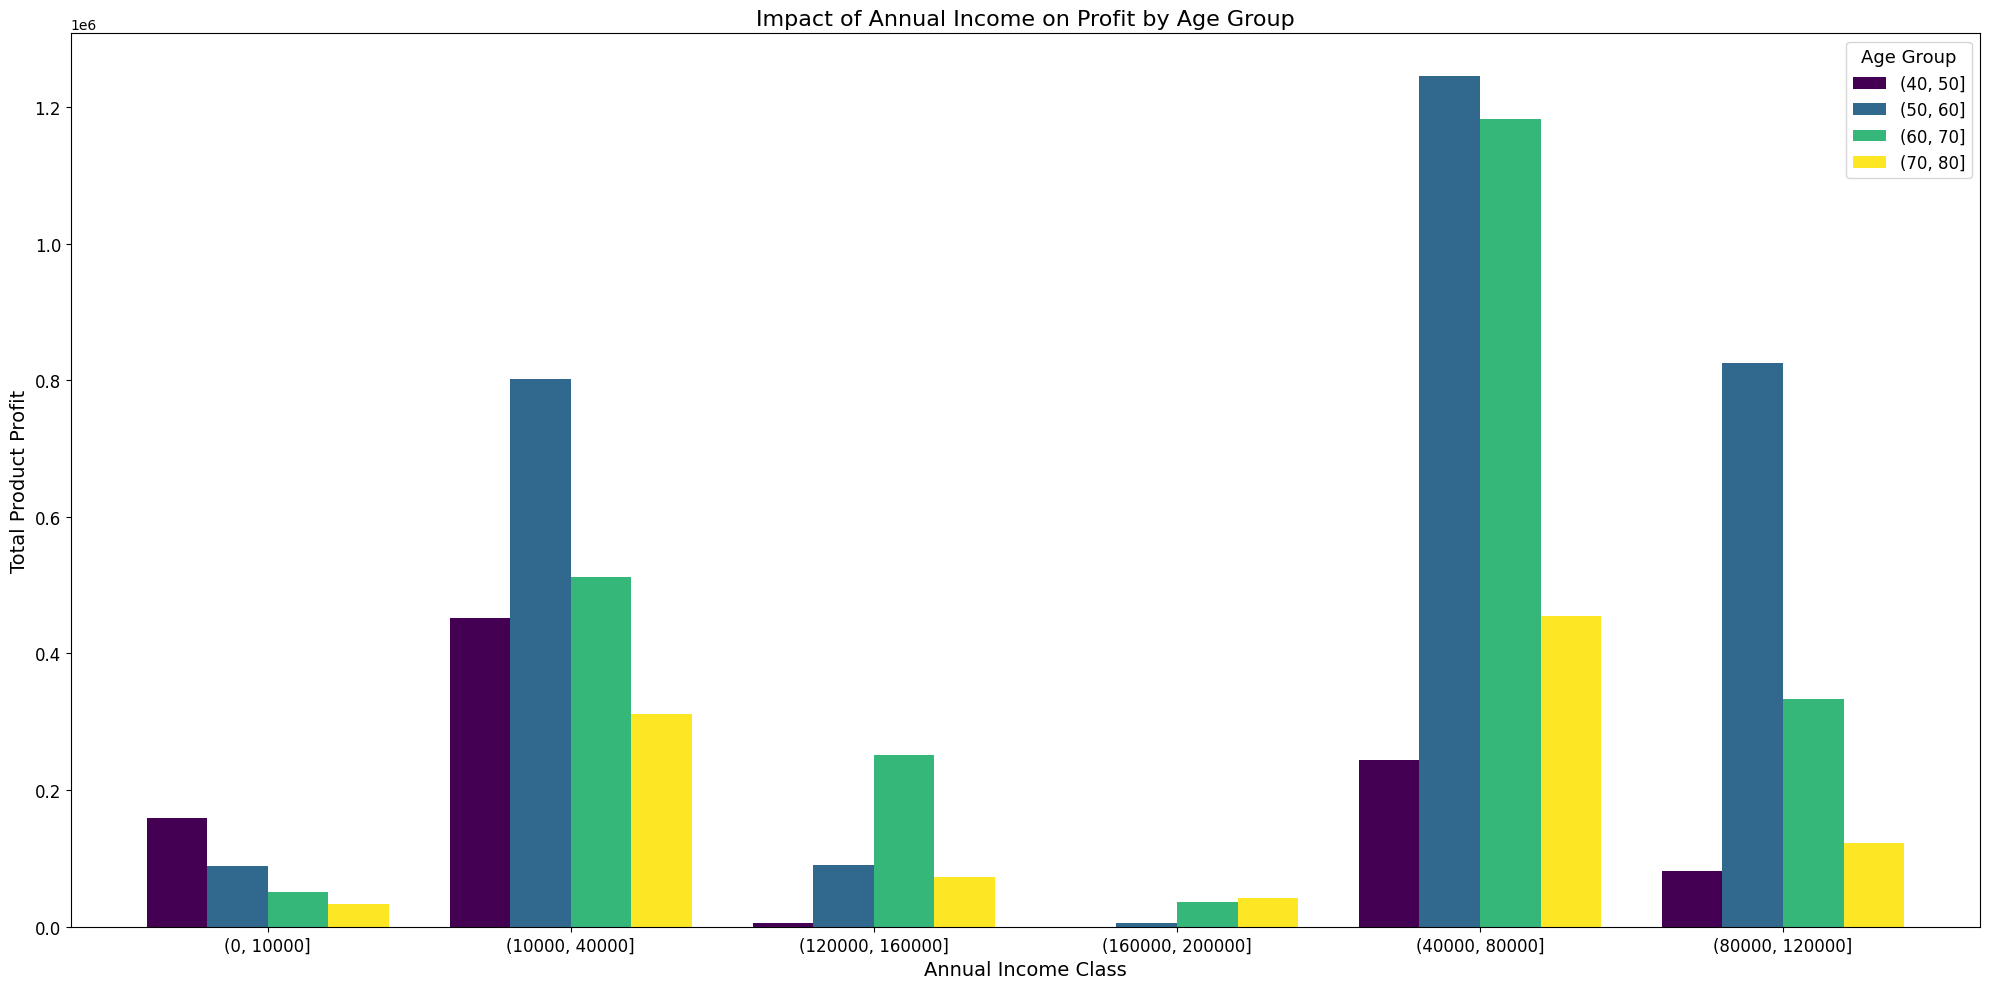

In [16]:
# Plot a grouped bar chart based on the pivot table
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
inc_age_profit_pivot.plot(
    kind='bar',
    ax=axes,
    width=0.8,
    stacked=False,
    colormap='viridis'
)

# Customize the chart
axes.set_title('Impact of Annual Income on Profit by Age Group', fontsize=16)
axes.set_xlabel('Annual Income Class', fontsize=14)
axes.set_ylabel('Total Product Profit', fontsize=14)
axes.legend(title='Age Group', fontsize=12, title_fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

From the graph above,
1. We can see that the higher income classes like (40000, 80000], (80000, 120000] tend to generate higher profits across all age groups, except in the lowest income bracket ((0, 10000]), where the profits are consistently lower.
2. The (60, 70] and (50, 60] age groups generate significantly higher profits compared to the younger (40, 50] and (70, 80] age groups in most income brackets. This suggests that older individuals with higher income levels may be more likely to make profitable purchases or contribute more profit in the dataset.
3. The (70, 80] age group generally shows lower profits, especially in the lower income brackets. This could indicate that older individuals with lower income are less likely to contribute to profit generation.

#### Gender that contributes to our Profit

In [17]:
# Get the total profit by Gender
gender_profit = df.groupby('Gender', observed=False)['ProductProfit'].sum().reset_index(name='TotalProfit')
gender_profit

,Gender,TotalProfit
0,F,3724787.70
1,M,3674945.61


From the above table, we can conclude that female customers contribute the most to our profit.
To further solidify our stratgey, let's look at their occupations to find our group of valuable customers.

#### Impact of Gender and Occupation on Total Profit

In [18]:
# This time we don't need to get the pivot since we can plot the bar chart using seaborn
gender_occu_profit = df.groupby(['Gender','Occupation'], observed=False)['ProductProfit'].sum().reset_index(name='TotalProfit')
gender_occu_profit

,Gender,Occupation,TotalProfit
0,F,Clerical,516092.27
1,F,Management,580830.88
2,F,Manual,310259.14
3,F,Professional,1447418.61
4,F,Skilled Manual,870186.80
5,M,Clerical,553630.97
6,M,Management,624390.70
7,M,Manual,343066.87
8,M,Professional,1337421.18
9,M,Skilled Manual,816435.89


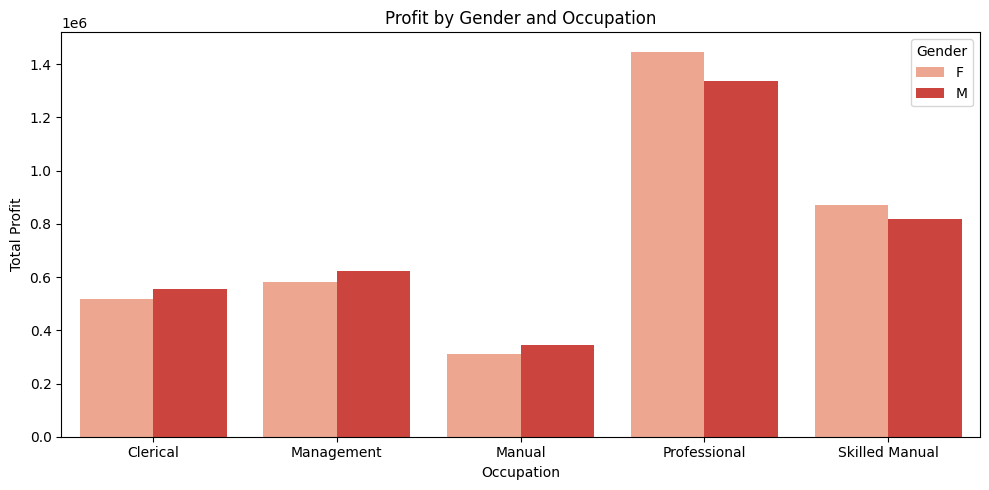

In [19]:
# Let's plot a bar chart to view the values better
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=gender_occu_profit,
    x='Occupation',
    y='TotalProfit',
    hue='Gender',
    palette='Reds'
)

# Customize the chart
plt.title('Profit by Gender and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Profit')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This analysis shows us that:
1. Professional occupations drive the highest profits for both genders, with females slightly outperforming males in this category.
2. Skilled Manual occupations show considerable profit for females, but Manual occupations generate significantly less.
3. There's a gender difference in the profitability of certain occupations, but the overall pattern is that higher-skilled, professional occupations generate more profit.


So far, from this we can say that our valuable customers are:
1. around the age of 51 to 70
2. mostly females
3. they work as professionals
4. have annual income around 40,000 to 80,000 dollars

Let's look at their contibutions by country across the years next.

#### Profit by Country and Year

In [32]:
# Convert 'Year' column to only display YYYY
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year
# Convert it to string
df['Year'] = df['Year'].astype(str)

In [33]:
df['Year'].head()

,Year
0,2016
1,2016
2,2016
3,2016
4,2016


In [34]:
# Get the sum of profit by country and year
profit2 = df.groupby(['Country', 'Year'])['ProductProfit'].sum().reset_index()
profit2.head()

,Country,Year,ProductProfit
0,Australia,2015,709493.66
1,Australia,2016,1146705.50
2,Australia,2017,870434.52
3,Canada,2015,118686.45
4,Canada,2016,101521.83


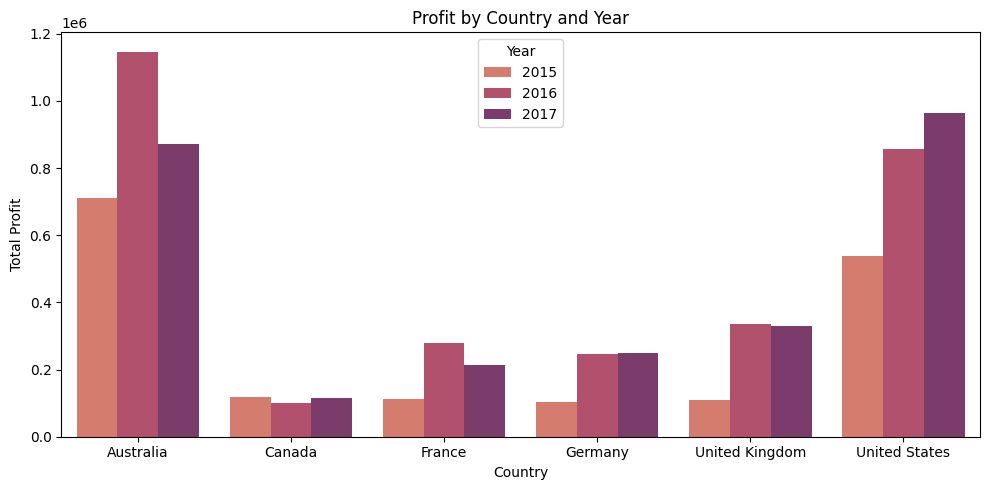

In [35]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=profit2,
    x='Country',
    y='ProductProfit',
    hue='Year',
    palette='flare'
)

# Customize the chart
plt.title('Profit by Country and Year')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.legend(title='Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the total profit over the years, **Australia has the highest total profit, making it the most profitable country overall** while the United States follows closely. Australia's high total profit highlights it as the strongest performer over the three years, likely due to the substantial peak in 2016. This suggests a robust market with opportunities for continued investment or scaling.

However, if we were to analyze the trends and fluctuations of profit across the countries in those three years, we would need a normal distribution of the profit. Normalizing the total profit would help us to:
* spot best and worst-performing years for each group
* observe year-over-year fluctuations without being skewed by the magnitude of the raw profits
* provides insights into where a country is growing or declining within its own context, guiding decisions on future investments or interventions


In [36]:
# Normalize the total profit by country and year
profit2['NormalizedByGroup'] = profit2.groupby('Country')['ProductProfit'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
profit2.head()

,Country,Year,ProductProfit,NormalizedByGroup
0,Australia,2015,709493.66,0.000000
1,Australia,2016,1146705.50,1.000000
2,Australia,2017,870434.52,0.368107
3,Canada,2015,118686.45,1.000000
4,Canada,2016,101521.83,0.000000


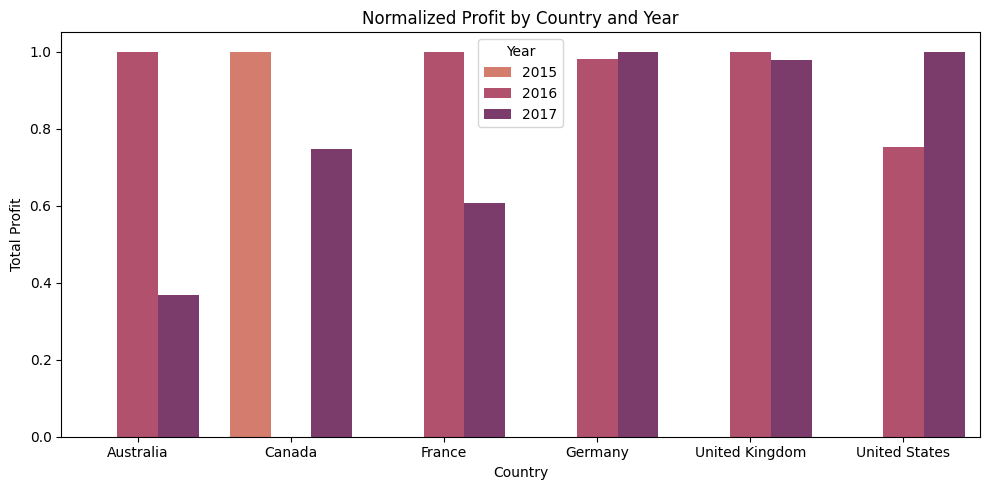

In [40]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=profit2,
    x='Country',
    y='NormalizedByGroup',
    hue='Year',
    palette='flare'
)

# Customize the chart
plt.title('Normalized Profit by Country and Year')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.legend(title='Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the normalized profit, we can say that:
1. Countries like Germany and the United States show consistent growth trends, indicating stable and potentially scalable markets.
2. Meanwhile, countries like Canada and France have volatility that needs addressing to ensure more consistent profitability in the future.
3. Australia, Canada, France, and the United Kingdom experienced peaks and dips, reflecting potential external factors (e.g., market dynamics or economic conditions) impacting profits.
4. Germany and the United States demonstrated a clear upward trend, with profits increasing year over year from 2015 to 2017.

Hence, we can recommend to:
1. Focus on addressing the factors causing volatility to stabilize the performance in Canada.
2. Explore ways to build on the near-peak performance of 2016 and 2017 to avoid future stagnation in UK.
3. Investigate the cause of decline in 2017 in Australia.

#### Now, let's look at the top products by profit

In [41]:
most_sold = df.groupby('ModelName')['ProductProfit'].size().reset_index(name='TotalProfit')
most_sold.head()

,ModelName,TotalProfit
0,All-Purpose Bike Stand,172
1,Bike Wash,787
2,Classic Vest,319
3,Cycling Cap,2281
4,Fender Set - Mountain,1779


In [42]:
# Sort the models by total quantity in descending order and select the top 10
top_10_models = most_sold.sort_values(by='TotalProfit', ascending=False).head(10)
top_10_models

,ModelName,TotalProfit
32,Sport-100,5556
38,Water Bottle,5173
16,Mountain Tire Tube,3624
21,Patch kit,3302
18,Mountain-200,3153
15,Mountain Bottle Cage,2423
3,Cycling Cap,2281
23,Road Bottle Cage,2050
24,Road Tire Tube,1982
4,Fender Set - Mountain,1779


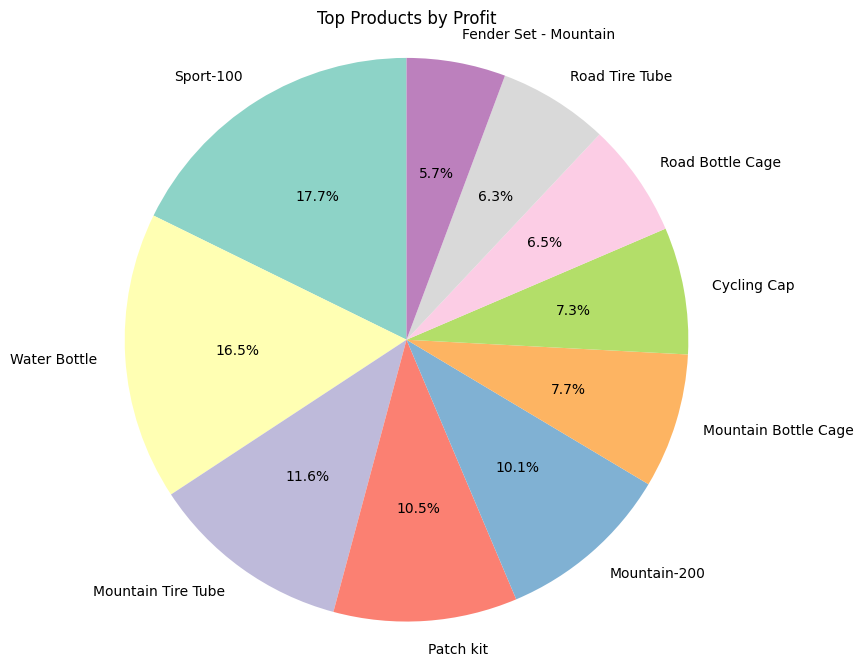

In [44]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
# Pass the 'TotalProfit' column for numerical data
plt.pie(top_10_models['TotalProfit'], labels=top_10_models['ModelName'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(top_10_models)))
plt.title('Top Products by Profit')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

### Next, we look at the total Sales over time

In [ ]:
# Aggregate sales by OrderDate
total_sales = df.groupby('OrderDate')['OrderQuantity'].sum().reset_index(name = 'TotalSales')
total_sales.head()

,OrderDate,TotalSales
0,2015-01,171
1,2015-02,129
2,2015-03,188
3,2015-04,198
4,2015-05,171


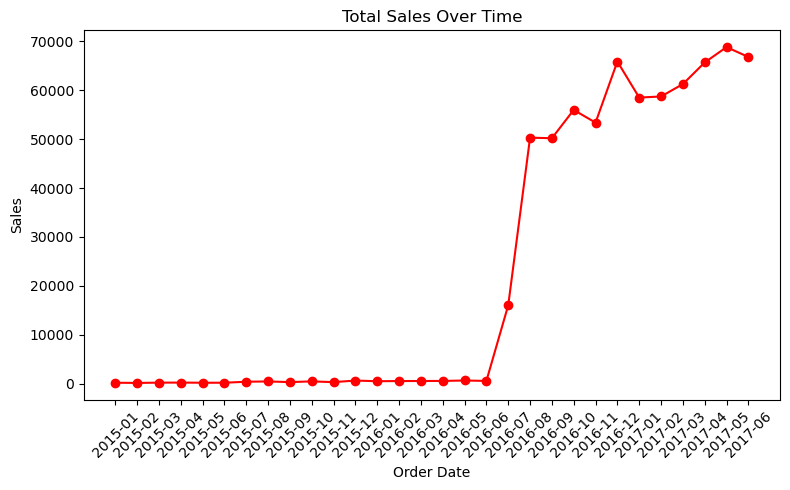

In [ ]:
# Plot the Sales over Time using a scatter plot
plt.figure(figsize=(8, 5))
plt.plot(total_sales['OrderDate'], total_sales['TotalSales'], color='red', marker = 'o')
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### The sales of the company had significantly increased from the mid of 2016. Even with ups and downs in sales, it did not fall out terribly. This shows that the marketing strategy that was probably implemented during 2016-2017 had worked in our favour.

### To support the above finding, let's look at the total profit over the years

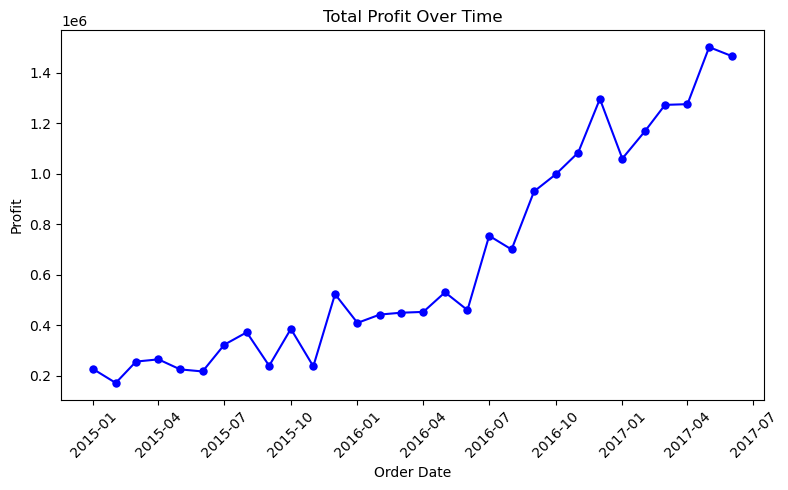

In [ ]:
# Ensure that the 'OrderDate' column is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Aggregate profit by OrderDate
profit = df.groupby('OrderDate')['ProductProfit'].sum().reset_index()

# Plot the Profit over Time using a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(profit['OrderDate'], profit['ProductProfit'], color='blue', alpha=1, edgecolors='w', s=50)
plt.plot(profit['OrderDate'], profit['ProductProfit'], color='blue') # To plot the line graph
plt.title('Total Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As expected, the total profit had increased steadily from the mid of 2016, as what we saw in the total sales over time analysis.

### We can now look at the customer behaviour in each country by analyzing the profit by product category in those countries

In [47]:
# Group by 'Country' and 'Category', then calculate the total 'OrderQuantity' (sales)
profit_by_country_category = df.groupby(['Country', 'CategoryName'])['ProductProfit'].sum().reset_index(name='TotalProfit')

# Sort the data to get the countries with the most sales by category
sorted_profit = profit_by_country_category.sort_values(by=['CategoryName', 'TotalProfit'], ascending=[True, False])
sorted_profit

,Country,CategoryName,TotalProfit
15,United States,Accessories,141153.10
0,Australia,Accessories,81860.16
3,Canada,Accessories,55689.81
12,United Kingdom,Accessories,37355.37
6,France,Accessories,35448.65
9,Germany,Accessories,27896.18
1,Australia,Bikes,2621474.48
16,United States,Bikes,2173272.11
13,United Kingdom,Bikes,728243.52
10,Germany,Bikes,565431.59


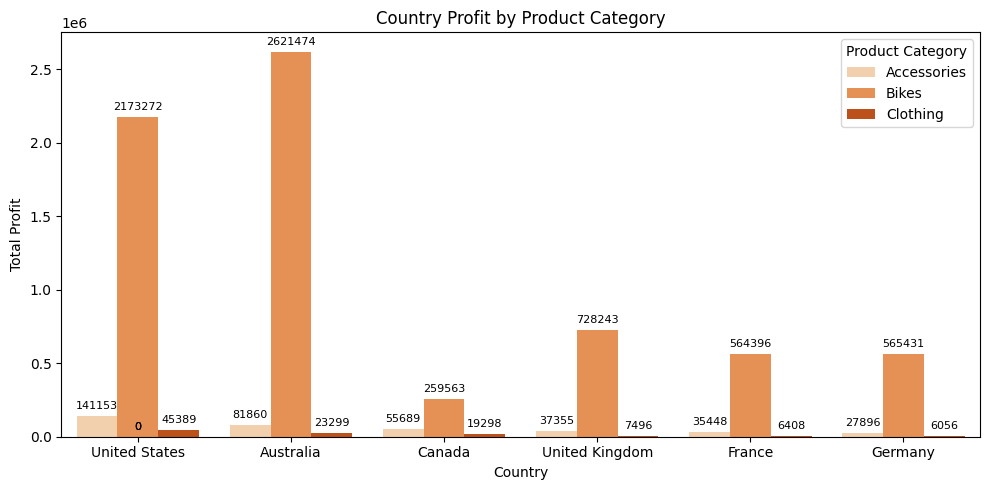

In [46]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=sorted_profit,
    x='Country',
    y='TotalProfit',
    hue='CategoryName',
    palette='Oranges'
)

# Add the counts as text on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='baseline',
        fontsize=8,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Customize the chart
plt.title('Country Profit by Product Category')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.legend(title='Product Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From this, we can deduce that:
* Bikes generates the highest total profit overall, with Australia and United States as the top contributors.
* Accessories sees a strong profit from United States, Australia, and Canada, but the profits are smaller compared to Bikes.
* Clothing generates the lowest total profit across the countries, with United States and Australia being the top contributors.
* United States contributes substantially across all categories but is particularly dominant in Accessories and Bikes.
* Australia and Canada are also significant players, especially in the Bikes category, but their contributions to Accessories and Clothing are smaller compared to the United States.

### We also need to know the impact of product price on the profit

In [48]:
# Impact of Price on Profit (If price is continuous)
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')
price_profit_correlation = df[['ProductPrice', 'ProductProfit']].dropna().corr()
price_profit_correlation

,ProductPrice,ProductProfit
ProductPrice,1.000000,0.995299
ProductProfit,0.995299,1.000000


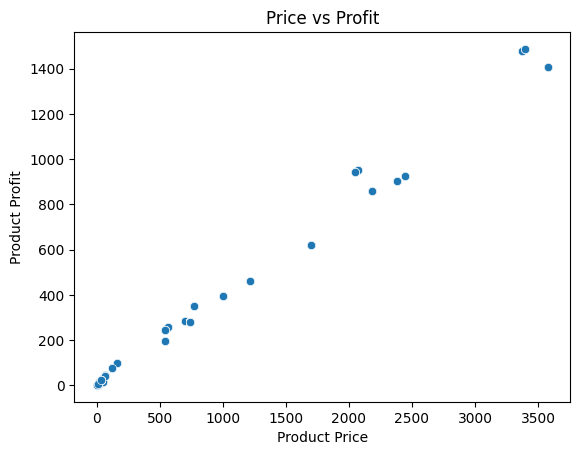

In [49]:
# Plot scatter plot
sns.scatterplot(data=df, x='ProductPrice', y='ProductProfit')
plt.title('Price vs Profit')
plt.xlabel('Product Price')
plt.ylabel('Product Profit')
plt.show()

ProductPrice and ProductProfit have a correlation coefficient of 0.995299, which is very close to 1. This indicates a strong positive linear relationship between the two variables. In other words, as the price of a product increases, the profit generated from that product also tends to increase. This supports what Kotler et al. (2015) said in Marketing Management (15th ed.).

### Now that we had analyzed and seen the trends and impacts, we now need to if we can retain the customers we have. For that, we need to look at the customer retention rate.

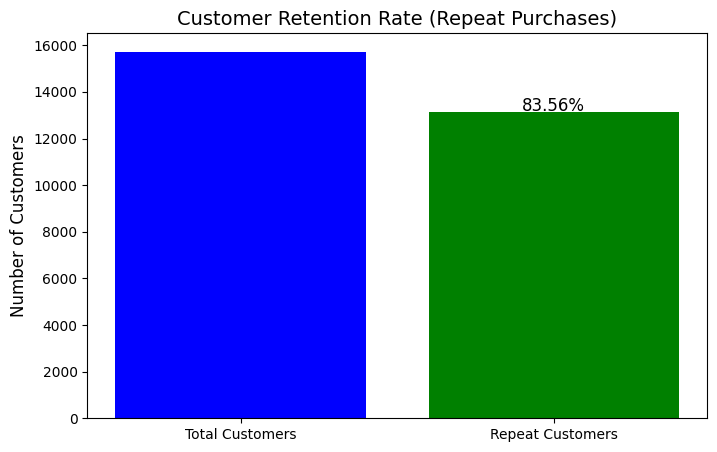

In [51]:
# Customer retention rate (Repeat orders)

# Calculate the total number of unique customers
total_customers = df['CustomerKey'].nunique()

# Calculate the number of repeat customers (already calculated in repeat_purchase_rate)
repeat_customers_count = repeat_customers['CustomerKey'].nunique()

# Plot the retention rate
labels = ['Total Customers', 'Repeat Customers']
values = [total_customers, repeat_customers_count]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green'])

# Add titles and labels
plt.title('Customer Retention Rate (Repeat Purchases)', fontsize=14)
plt.ylabel('Number of Customers', fontsize=12)

# Display the percentage of repeat customers
repeat_percentage = (repeat_customers_count / total_customers) * 100
plt.text(1, repeat_customers_count + 50, f'{repeat_percentage:.2f}%', ha='center', fontsize=12)

# Show the plot
plt.show()

With a repeat customer rate of 83.56%, this indicates that the vast majority of customers are making repeat purchases. This is a strong signal of customer loyalty and satisfaction. High repeat purchase rates often correlate with:

* Customers are likely satisfied with the products they purchased, leading them to return.
* If applicable, loyalty programs or incentives may be encouraging customers to make repeat purchases.
* Strong brand loyalty can drive repeat business, especially if the products meet or exceed customer expectations.
* Good customer support and personalized experiences can significantly influence the likelihood of repeat purchases.

### Lastly, we need to know our most valuable customers through determining the Customer Lifetime Value (CLV)

In [53]:
# Calculate Average Purchase Value
average_purchase_value = df['ProductProfit'].sum() / df['CustomerKey'].nunique()

# Determine the purchase frequency
purchase_frequency = df.groupby('CustomerKey')['ProductProfit'].count().mean()

# Calculate customer lifespan
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
customer_lifespan = (df.groupby('CustomerKey')['OrderDate'].max() - df.groupby('CustomerKey')['OrderDate'].min()).mean()

# Convert customer_lifespan to days to avoid OverflowError
customer_lifespan_days = customer_lifespan.days

# Calculate CLV of each customer using customer_lifespan_days
df['CLV'] = (average_purchase_value * purchase_frequency * customer_lifespan_days)

In [54]:
# Identify the Most Valuable Customers
top_customers = df.groupby('CustomerKey')['CLV'].sum().sort_values(ascending=False).head(10)
top_customers

,CLV
CustomerKey,
11300,9.056123e+06
11277,8.080848e+06
11185,8.080848e+06
11287,7.384223e+06
11262,7.384223e+06
11223,7.384223e+06
11331,7.384223e+06
11091,7.384223e+06
11200,7.244898e+06


From this, we can say:
* Customer 11300 is your most valuable customer, with a CLV that far exceeds others. This suggests they have consistently made high-value purchases over time.
* Customers with CLV around 8-9 million (such as 11277 and 11185) should be prioritized for loyalty programs, personalized offers, and retention efforts.
* Many customers have a similar CLV of 7.38 million, indicating they could be within the same behavioral or spending segment. Identifying these customers and analyzing their characteristics (age, gender, products purchased, etc.) could lead to strategies for increasing their CLV.

Therefore:
* Since these customers have a significant impact on your revenue, focus on retaining them by offering personalized promotions or exclusive deals.
* Look into the purchasing habits of these top customers (e.g., frequency of purchases, product preferences) to replicate this behavior in other customers.
* Consider setting up or enhancing loyalty programs for customers with high CLV, rewarding them for continued purchases.